### Лабораторная работа №1. Предварительная обработка данных.
Выполнил: Гусев Павел 20-ИВТ-3

Вариант №2


Отмена рейсов
1. Подсчитайте количество отменённых рейсов.
2. Определите аэропорт, рейсы для которого отменяются наиболее часто.
3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем. Оцените значение p-value. Постройте плотность распределения признаков.
4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.
6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).
7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.
8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.
9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.




In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
flights_df = pd.read_csv('flights.csv', sep=',', nrows = 1000000)
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015,3,7,6,OO,6396,N114SY,BOI,SFO,915,...,957.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999996,2015,3,7,6,AA,334,N566AA,DFW,MFE,916,...,1042.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999997,2015,3,7,6,MQ,3641,N601MQ,DSM,DFW,916,...,1131.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999998,2015,3,7,6,OO,5244,N710SK,LAX,ASE,916,...,1242.0,26.0,0,0,NaN,26.0,0.0,0.0,0.0,0.0


1. Подсчитайте количество отменённых рейсов.

In [29]:
cancelled_df = flights_df['CANCELLED']
cancelled_df[cancelled_df == 1].count()

40132

2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [17]:
cancelled_airport_df = flights_df[flights_df.CANCELLED == 1][['DESTINATION_AIRPORT']].value_counts()
cancelled_airport_df.head(1)

DESTINATION_AIRPORT
DFW                    3677
dtype: int64

3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем.

In [4]:
flight_spearman_week = flights_df[['DAY_OF_WEEK','CANCELLED']].corr('pearson')
flight_person_month = flights_df[['MONTH','CANCELLED']].corr('pearson')
flight_spearman_week = flights_df[['DAY_OF_WEEK','CANCELLED']].corr('spearman')
flight_spearman_month = flights_df[['MONTH','CANCELLED']].corr('spearman')

print('Пирсон между днем недели и отменой рейса:\n' + str(flight_spearman_week))
print('Пирсон между месяцем и отменой рейса:\n' + str(flight_person_month))
print('Cпирман между днем недели и отменой рейса:\n' + str(flight_spearman_week))
print('Cпирман между месяцем и отменой рейса:\n' + str(flight_spearman_month))

Пирсон между днем недели и отменой рейса:
             DAY_OF_WEEK  CANCELLED
DAY_OF_WEEK     1.000000  -0.035746
CANCELLED      -0.035746   1.000000
Пирсон между месяцем и отменой рейса:
              MONTH  CANCELLED
MONTH      1.000000   0.080883
CANCELLED  0.080883   1.000000
Cпирман между днем недели и отменой рейса:
             DAY_OF_WEEK  CANCELLED
DAY_OF_WEEK     1.000000  -0.035746
CANCELLED      -0.035746   1.000000
Cпирман между месяцем и отменой рейса:
              MONTH  CANCELLED
MONTH      1.000000   0.078987
CANCELLED  0.078987   1.000000


4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [5]:
print(flights_df['AIRLINE'][flights_df.AIRLINE == 'AS'].value_counts())
print(flights_df[flights_df.AIRLINE == 'AS'][['DIVERTED']].value_counts())
print(flights_df[flights_df.AIRLINE == 'AS'][['CANCELLED']].value_counts())

print(flights_df['AIRLINE'][flights_df.AIRLINE == 'DL'].value_counts())
print(flights_df[flights_df.AIRLINE == 'DL'][['DIVERTED']].value_counts())
print(flights_df[flights_df.AIRLINE == 'DL'][['CANCELLED']].value_counts())

print(flights_df['AIRLINE'][flights_df.AIRLINE == 'US'].value_counts())
print(flights_df[flights_df.AIRLINE == 'US'][['DIVERTED']].value_counts())
print(flights_df[flights_df.AIRLINE == 'US'][['CANCELLED']].value_counts())

AS    28220
Name: AIRLINE, dtype: int64
DIVERTED
0           28120
1             100
dtype: int64
CANCELLED
0            28030
1              190
dtype: int64
DL    140424
Name: AIRLINE, dtype: int64
DIVERTED
0           140179
1              245
dtype: int64
CANCELLED
0            137565
1              2859
dtype: int64
US    70657
Name: AIRLINE, dtype: int64
DIVERTED
0           70489
1             168
dtype: int64
CANCELLED
0            67529
1             3128
dtype: int64


5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [73]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1000000 non-null  int64  
 1   MONTH                1000000 non-null  int64  
 2   DAY                  1000000 non-null  int64  
 3   DAY_OF_WEEK          1000000 non-null  int64  
 4   AIRLINE              1000000 non-null  object 
 5   FLIGHT_NUMBER        1000000 non-null  int64  
 6   TAIL_NUMBER          992291 non-null   object 
 7   ORIGIN_AIRPORT       1000000 non-null  object 
 8   DESTINATION_AIRPORT  1000000 non-null  object 
 9   SCHEDULED_DEPARTURE  1000000 non-null  int64  
 10  DEPARTURE_TIME       960842 non-null   float64
 11  DEPARTURE_DELAY      960842 non-null   float64
 12  TAXI_OUT             960145 non-null   float64
 13  WHEELS_OFF           960145 non-null   float64
 14  SCHEDULED_TIME       999998 non-null   float64
 15 

In [5]:
flights_df['VELOCITY'] = flights_df['DISTANCE'] / (flights_df['ELAPSED_TIME'] / 60)
flights_df['VELOCITY']

0         447.835052
1         501.075269
2         470.170648
3         500.071174
4         404.093023
             ...    
999995    298.285714
999996    339.036145
999997    334.285714
999998    300.816327
999999    424.423963
Name: VELOCITY, Length: 1000000, dtype: float64

In [24]:
aver_velocity_as = flights_df[flights_df.AIRLINE == 'AS'][['VELOCITY']].mean()
aver_velocity_dl = flights_df[flights_df.AIRLINE == 'DL'][['VELOCITY']].mean()
aver_velocity_us = flights_df[flights_df.AIRLINE == 'US'][['VELOCITY']].mean()

print('Средняя скорость полёта для авиакомпании AS:\n' + str(aver_velocity_as))
print('Средняя скорость полёта для авиакомпании DL:\n' + str(aver_velocity_dl))
print('Средняя скорость полёта для авиакомпании US:\n' + str(aver_velocity_us))

Средняя скорость полёта для авиакомпании AS:
VELOCITY    371.12231
dtype: float64
Средняя скорость полёта для авиакомпании DL:
VELOCITY    330.204488
dtype: float64
Средняя скорость полёта для авиакомпании US:
VELOCITY    325.938012
dtype: float64


6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

In [8]:
sub_df = flights_df.drop(flights_df[((flights_df.ORIGIN_AIRPORT != 'LAX') & (flights_df.ORIGIN_AIRPORT != 'SFO'))].index)
sub_df.sort_values('DAY_OF_WEEK',ascending=True)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
496895,2015,2,2,1,WN,4300,N357SW,LAX,SFO,1850,...,2001.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
706793,2015,2,16,1,OO,6339,N585SW,LAX,SAN,1635,...,1727.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
706792,2015,2,16,1,OO,6329,N234SW,SFO,SBA,1635,...,1756.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
706791,2015,2,16,1,OO,4540,N187PQ,LAX,SJC,1635,...,1852.0,60.0,0,0,NaN,0.0,0.0,0.0,60.0,0.0
706779,2015,2,16,1,WN,913,N697SW,LAX,SMF,1635,...,1800.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905335,2015,3,1,7,OO,5367,N567SW,SFO,RDD,1230,...,1323.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
905339,2015,3,1,7,UA,1028,N67812,LAX,ORD,1231,...,1839.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
905354,2015,3,1,7,AA,170,N862AA,LAX,LAS,1235,...,1513.0,83.0,0,0,NaN,0.0,0.0,0.0,83.0,0.0
905270,2015,3,1,7,AA,4,N791AA,LAX,JFK,1230,...,2108.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Частота отмены рейсов в первый день недели

prob_df_1 = sub_df[(sub_df.DAY_OF_WEEK == 1) & (sub_df.CANCELLED == 1)]
prob_df_1_full = sub_df[(sub_df.DAY_OF_WEEK == 1)]
prob_1 = prob_df_1.shape[0]
density_1 = prob_1 / prob_df_1_full.shape[0]
print(density_1)

prob_df_2 = sub_df[(sub_df.DAY_OF_WEEK == 2) & (sub_df.CANCELLED == 1)]
prob_df_2_full = sub_df[(sub_df.DAY_OF_WEEK == 2)]
prob_2 = prob_df_1.shape[0]
density_2 = prob_2 / prob_df_2_full.shape[0]
print(density_2)

prob_df_3 = sub_df[(sub_df.DAY_OF_WEEK == 3) & (sub_df.CANCELLED == 1)]
prob_df_3_full = sub_df[(sub_df.DAY_OF_WEEK == 3)]
prob_3 = prob_df_3.shape[0]
density_3 = prob_3 / prob_df_3_full.shape[0]
print(density_3)

prob_df_4 = sub_df[(sub_df.DAY_OF_WEEK == 4) & (sub_df.CANCELLED == 1)]
prob_df_4_full = sub_df[(sub_df.DAY_OF_WEEK == 4)]
prob_4 = prob_df_4.shape[0]
density_4 = prob_4 / prob_df_4_full.shape[0]
print(density_4)

prob_df_5 = sub_df[(sub_df.DAY_OF_WEEK == 5) & (sub_df.CANCELLED == 1)]
prob_df_5_full = sub_df[(sub_df.DAY_OF_WEEK == 5)]
prob_5 = prob_df_5.shape[0]
density_5 = prob_5 / prob_df_5_full.shape[0]
print(density_5)

prob_df_6 = sub_df[(sub_df.DAY_OF_WEEK == 6) & (sub_df.CANCELLED == 1)]
prob_df_6_full = sub_df[(sub_df.DAY_OF_WEEK == 6)]
prob_6 = prob_df_6.shape[0]
density_6 = prob_6 / prob_df_6_full.shape[0]
print(density_6)

prob_df_7 = sub_df[(sub_df.DAY_OF_WEEK == 7) & (sub_df.CANCELLED == 1)]
prob_df_7_full = sub_df[(sub_df.DAY_OF_WEEK == 7)]
prob_7 = prob_df_7.shape[0]
density_7 = prob_7 / prob_df_7_full.shape[0]
print(density_7)

0.03273518216421969
0.034522307604083036
0.013616925500787755
0.014710180224062348
0.01955896452540748
0.01659377411885773
0.03151065801668211


In [11]:
density_df = pd.DataFrame({"CANCELLATION_DENSITY" : [density_1, density_2, density_3, density_4, density_5, 
                                                     density_6, density_7], 
                           "DAY_OF_WEEK":[1, 2, 3, 4, 5, 6, 7] }, index = [1, 2, 3, 4, 5, 6, 7])
density_df

,CANCELLATION_DENSITY,DAY_OF_WEEK
1,0.032735,1
2,0.034522,2
3,0.013617,3
4,0.014710,4
5,0.019559,5
6,0.016594,6
7,0.031511,7


In [12]:
final_df = pd.merge(sub_df, density_df, how = 'inner', on = 'DAY_OF_WEEK')
final_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLATION_DENSITY
0,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.014710
1,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.014710
2,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.014710
3,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.014710
4,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.014710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63896,2015,3,4,3,UA,1557,N66825,LAX,EWR,2353,...,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.013617
63897,2015,3,4,3,AA,1062,N3CBAA,LAX,ORD,2354,...,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.013617
63898,2015,3,4,3,OO,6519,N744SK,LAX,AUS,2355,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.013617
63899,2015,3,4,3,DL,1254,N820DN,LAX,ATL,2357,...,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.013617


In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63901 entries, 0 to 63900
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  63901 non-null  int64  
 1   MONTH                 63901 non-null  int64  
 2   DAY                   63901 non-null  int64  
 3   DAY_OF_WEEK           63901 non-null  int64  
 4   AIRLINE               63901 non-null  object 
 5   FLIGHT_NUMBER         63901 non-null  int64  
 6   TAIL_NUMBER           63565 non-null  object 
 7   ORIGIN_AIRPORT        63901 non-null  object 
 8   DESTINATION_AIRPORT   63901 non-null  object 
 9   SCHEDULED_DEPARTURE   63901 non-null  int64  
 10  DEPARTURE_TIME        62567 non-null  float64
 11  DEPARTURE_DELAY       62567 non-null  float64
 12  TAXI_OUT              62557 non-null  float64
 13  WHEELS_OFF            62557 non-null  float64
 14  SCHEDULED_TIME        63901 non-null  float64
 15  ELAPSED_TIME       

In [15]:
the_final_df = final_df[['DAY_OF_WEEK', 
                         'AIRLINE', 'CANCELLATION_DENSITY']]
the_final_df.sort_values('DAY_OF_WEEK',ascending=True)

the_final_df.pivot_table(index = 'DAY_OF_WEEK', columns = 'AIRLINE', values = 'CANCELLATION_DENSITY' )

AIRLINE,AA,AS,B6,DL,F9,HA,MQ,NK,OO,UA,US,VX,WN
DAY_OF_WEEK,,,,,,,,,,,,,
1,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735,0.032735
2,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522,0.034522
3,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617,0.013617
4,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710,0.014710
5,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559,0.019559
6,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594,0.016594
7,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511,0.031511


<AxesSubplot:title={'center':'DAY_OF_WEEK - AIRLINE - CANCELLATION'}, xlabel='AIRLINE', ylabel='DAY_OF_WEEK'>

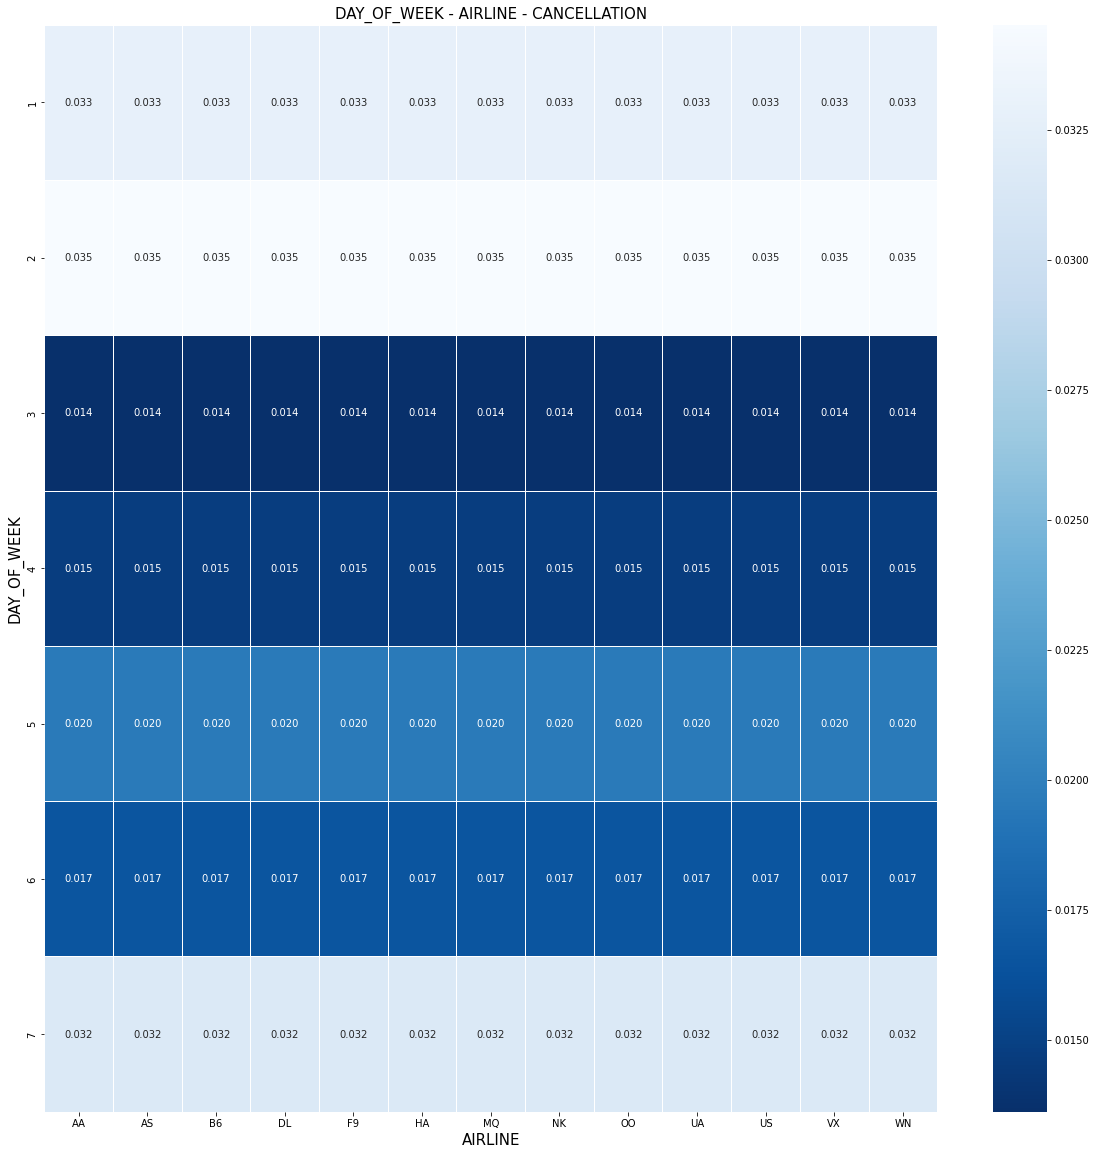

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
pivot_table = the_final_df.pivot_table(index = 'DAY_OF_WEEK', columns = 'AIRLINE', values = 'CANCELLATION_DENSITY')
plt.xlabel('DAY_OF_WEEK', size = 15)
plt.ylabel('AIRLINE', size = 15)
plt.title('DAY_OF_WEEK - AIRLINE - CANCELLATION', size = 15)
sns.heatmap(pivot_table, annot = True, fmt = ".3f", linewidths = .5, square = False, cmap = 'Blues_r')

7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

In [79]:
delay_df = flights_df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'ORIGIN_AIRPORT']]
delay_df

,DEPARTURE_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
0,-11.0,-22.0,ANC
1,-8.0,-9.0,LAX
2,-2.0,5.0,SFO
3,-5.0,-9.0,LAX
4,-1.0,-21.0,SEA
...,...,...,...
999995,-3.0,-16.0,BOI
999996,3.0,-8.0,DFW
999997,23.0,11.0,DSM
999998,-1.0,26.0,LAX


In [80]:
new_delay_df = delay_df[(delay_df.ORIGIN_AIRPORT == 'BOI') | (delay_df.ORIGIN_AIRPORT == 'LAX') 
                        | (delay_df.ORIGIN_AIRPORT == 'SFO')]
new_delay_df

,DEPARTURE_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
1,-8.0,-9.0,LAX
2,-2.0,5.0,SFO
3,-5.0,-9.0,LAX
5,-5.0,8.0,SFO
7,14.0,-10.0,LAX
...,...,...,...
999971,117.0,125.0,SFO
999973,0.0,3.0,SFO
999993,-16.0,-6.0,LAX
999995,-3.0,-16.0,BOI


8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

In [81]:
sub_delay_df = flights_df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                           'WEATHER_DELAY', 'ORIGIN_AIRPORT', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY']]
sub_delay_df = sub_delay_df[(sub_delay_df.ARRIVAL_DELAY != 0) & (sub_delay_df.DEPARTURE_DELAY != 0)]
sub_delay_df

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_AIRPORT,ARRIVAL_DELAY,DEPARTURE_DELAY
0,NaN,NaN,NaN,NaN,NaN,ANC,-22.0,-11.0
1,NaN,NaN,NaN,NaN,NaN,LAX,-9.0,-8.0
2,NaN,NaN,NaN,NaN,NaN,SFO,5.0,-2.0
3,NaN,NaN,NaN,NaN,NaN,LAX,-9.0,-5.0
4,NaN,NaN,NaN,NaN,NaN,SEA,-21.0,-1.0
...,...,...,...,...,...,...,...,...
999995,NaN,NaN,NaN,NaN,NaN,BOI,-16.0,-3.0
999996,NaN,NaN,NaN,NaN,NaN,DFW,-8.0,3.0
999997,NaN,NaN,NaN,NaN,NaN,DSM,11.0,23.0
999998,26.0,0.0,0.0,0.0,0.0,LAX,26.0,-1.0


In [87]:
new_sub_delay_df = sub_delay_df[(sub_delay_df.ORIGIN_AIRPORT == 'BOI') | (sub_delay_df.ORIGIN_AIRPORT == 'LAX') 
                        | (sub_delay_df.ORIGIN_AIRPORT == 'SFO')]
new_sub_delay_df = new_sub_delay_df.dropna(thresh=1, subset=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                                                             'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])
new_sub_delay_df

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_AIRPORT,ARRIVAL_DELAY,DEPARTURE_DELAY
92,7.0,0.0,19.0,0.0,0.0,SFO,26.0,19.0
342,0.0,0.0,30.0,0.0,0.0,BOI,30.0,39.0
588,0.0,0.0,55.0,0.0,0.0,SFO,55.0,76.0
983,0.0,0.0,24.0,3.0,0.0,SFO,27.0,29.0
1078,5.0,0.0,27.0,0.0,0.0,BOI,32.0,27.0
...,...,...,...,...,...,...,...,...
999744,0.0,0.0,38.0,0.0,0.0,LAX,38.0,36.0
999946,3.0,0.0,206.0,0.0,0.0,LAX,209.0,206.0
999948,32.0,0.0,0.0,0.0,0.0,LAX,32.0,-8.0
999971,0.0,0.0,117.0,0.0,8.0,SFO,125.0,117.0


In [88]:
delay_BOI = new_sub_delay_df[(new_sub_delay_df.ORIGIN_AIRPORT == 'BOI')]

AIR_SYSTEM = delay_BOI['AIR_SYSTEM_DELAY'].sum()
SECURITY = delay_BOI['SECURITY_DELAY'].sum()
AIRLINE = delay_BOI['AIRLINE_DELAY'].sum()
LATE_AIRCRAFT = delay_BOI['LATE_AIRCRAFT_DELAY'].sum()
WEATHER = delay_BOI['WEATHER_DELAY'].sum()
ARRIVAL = AIR_SYSTEM + SECURITY + AIRLINE + LATE_AIRCRAFT + WEATHER

new_delay_BOI = pd.DataFrame({"AIR_SYSTEM_DELAY" : [AIR_SYSTEM], "SECURITY_DELAY":[SECURITY], "AIRLINE_DELAY":[AIRLINE],
                          "LATE_AIRCRAFT_DELAY":[LATE_AIRCRAFT], 
                          "WEATHER_DELAY":[WEATHER], "ARRIVAL_DELAY" : [ARRIVAL], "ORIGIN_AIRPORT":['BOI']}, index = [1])
new_delay_BOI

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
1,6245.0,0.0,7348.0,11167.0,918.0,25678.0,BOI


In [89]:
delay_LAX = new_sub_delay_df[(new_sub_delay_df.ORIGIN_AIRPORT == 'LAX')]

AIR_SYSTEM = delay_LAX['AIR_SYSTEM_DELAY'].sum()
SECURITY = delay_LAX['SECURITY_DELAY'].sum()
AIRLINE = delay_LAX['AIRLINE_DELAY'].sum()
LATE_AIRCRAFT = delay_LAX['LATE_AIRCRAFT_DELAY'].sum()
WEATHER = delay_LAX['WEATHER_DELAY'].sum()
ARRIVAL = AIR_SYSTEM + SECURITY + AIRLINE + LATE_AIRCRAFT + WEATHER

new_delay_LAX = pd.DataFrame({"AIR_SYSTEM_DELAY" : [AIR_SYSTEM], "SECURITY_DELAY":[SECURITY], "AIRLINE_DELAY":[AIRLINE],
                          "LATE_AIRCRAFT_DELAY":[LATE_AIRCRAFT], 
                          "WEATHER_DELAY":[WEATHER], "ARRIVAL_DELAY" : [ARRIVAL], "ORIGIN_AIRPORT":['LAX']}, index = [1])
new_delay_LAX

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
1,86547.0,544.0,126214.0,165899.0,10038.0,389242.0,LAX


In [90]:
delay_SFO = new_sub_delay_df[(new_sub_delay_df.ORIGIN_AIRPORT == 'SFO')]

AIR_SYSTEM = delay_SFO['AIR_SYSTEM_DELAY'].sum()
SECURITY = delay_SFO['SECURITY_DELAY'].sum()
AIRLINE = delay_SFO['AIRLINE_DELAY'].sum()
LATE_AIRCRAFT = delay_SFO['LATE_AIRCRAFT_DELAY'].sum()
WEATHER = delay_SFO['WEATHER_DELAY'].sum()
ARRIVAL = AIR_SYSTEM + SECURITY + AIRLINE + LATE_AIRCRAFT + WEATHER

new_delay_SFO = pd.DataFrame({"AIR_SYSTEM_DELAY" : [AIR_SYSTEM], "SECURITY_DELAY":[SECURITY], "AIRLINE_DELAY":[AIRLINE],
                          "LATE_AIRCRAFT_DELAY":[LATE_AIRCRAFT], 
                          "WEATHER_DELAY":[WEATHER], "ARRIVAL_DELAY" : [ARRIVAL], "ORIGIN_AIRPORT":['SFO']}, index = [1])
new_delay_SFO

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
1,59299.0,179.0,109175.0,183855.0,9966.0,362474.0,SFO


In [93]:
sum_delay = pd.concat([new_delay_BOI, new_delay_LAX, new_delay_SFO])
sum_delay = sum_delay.reset_index().drop(['index'], axis=1)
sum_delay

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
0,6245.0,0.0,7348.0,11167.0,918.0,25678.0,BOI
1,86547.0,544.0,126214.0,165899.0,10038.0,389242.0,LAX
2,59299.0,179.0,109175.0,183855.0,9966.0,362474.0,SFO


<AxesSubplot:>

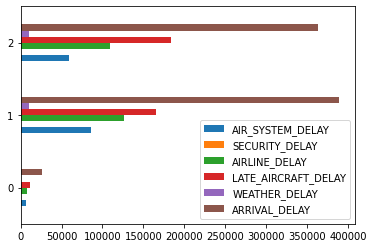

In [100]:
sum_delay.plot(kind = 'barh')

9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [107]:
arrival_df = sub_delay_df.groupby("ORIGIN_AIRPORT").sum()["ARRIVAL_DELAY"]
print(arrival_df.nlargest(arrival_df.shape[0]).head(1))

departure_df = sub_delay_df.groupby("ORIGIN_AIRPORT").sum()["DEPARTURE_DELAY"]
print(departure_df.nlargest(arrival_df.shape[0]).head(1))

ORIGIN_AIRPORT
ORD    1350985.0
Name: ARRIVAL_DELAY, dtype: float64
ORIGIN_AIRPORT
ORD    1146193.0
Name: DEPARTURE_DELAY, dtype: float64
